<b><font size="6"> Data Mining Project - Group 40 2025/2026 </font></b><br><br>
<i> <font size="4"> Amazing International Airlines Inc. (AIAI)</font></i>

`Group XX`

20250405 Ana Macedo <br>
20250453 Lourenço Silva <br>
20250380 Maria Fonseca <br>

# Import Libraries

In this section, we import the essential Python libraries that will support data processing, visualization, and analysis throughout the project. Each library provides specific functionality that helps streamline the workflow.

In [ ]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

from itertools import product
from ydata_profiling import ProfileReport

# for better resolution plots
%config InlineBackend.figure_format = 'retina'

#o svg consegue ampliar infinitamente os gráficos sem perder qualidade mas às vezes é mais lento 
#por isso agora usamos retina

np.random.seed(40311)
sns.set()

# Loading the Data

In this section, we load the datasets from CSV files using commas as column separators and set the unique customer identifier as the index for both tables. This step ensures that the data is properly structured, accessible, and ready for further exploration and analysis.

In [460]:
flightsDB = pd.read_csv('DM_AIAI_FlightsDB.csv', sep = ",", index_col= "Loyalty#")
customerDB = pd.read_csv('DM_AIAI_CustomerDB.csv', sep = ",", index_col= "Loyalty#")
metaData = pd.read_csv('DM_AIAI_Metadata.csv', sep = ";", header= None)

Remove the 'Unnamed' column referring to a sequential numbering of the rows, as we set the column "Loyalty#" as the index

In [461]:
customerDB = customerDB.iloc[:, 1:]
customerDB

,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
Loyalty#,,,,,,,,,,,,,,,,,,,
480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard
608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard
530508,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,-75.713364,J8Y 3Z5,male,Bachelor,Suburban,97832.0,Married,Star,10/25/2017,NaN,3842.79,2021 Promotion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100012,Ethan,Thompson,Ethan Thompson,Canada,Quebec,Quebec City,46.759733,-71.141009,Y0C 7D6,male,Bachelor,Suburban,NaN,Single,Star,2/27/2019,2/27/2019,NaN,Standard
100013,Layla,Young,Layla Young,Canada,Alberta,Edmonton,53.524829,-113.546357,L3S 9Y3,female,Bachelor,Rural,NaN,Married,Star,9/20/2017,9/20/2017,NaN,Standard
100014,Amelia,Bennett,Amelia Bennett,Canada,New Brunswick,Moncton,46.051866,-64.825428,G2S 2B6,male,Bachelor,Rural,NaN,Married,Star,11/28/2020,11/28/2020,NaN,Standard


# Metadata

In this section, we provide a detailed description of the variables contained in both datasets, FlightsDB and CustomerDB. Understanding the meaning and structure of each attribute is essential for interpreting the data correctly and guiding subsequent analytical steps.

**FlightsDB Database Variable Description**
- **Loyalty#:**	Unique customer identifier linking to CustomerDB
- **Year:**	Year of flight activity record
- **Month:**	Month of flight activity record (1-12)
- **YearMonthDate:**	First day of the month for the activity period
- **NumFlights:**	Total number of flights taken by customer in the month
- **NumFlightsWithCompanions:**	Number of flights where customer traveled with companions
- **DistanceKM:**	Total distance traveled in kilometers for the month
- **PointsAccumulated:**	Loyalty points earned by customer during the month
- **PointsRedeemed:**	Loyalty points spent/redeemed by customer during the month
- **DollarCostPointsRedeemed:**	Dollar value of points redeemed during the month

**CustomerDB Database Variable Description**
- **Loyalty#:**  Unique customer identifier for loyalty program members
- **First Name:**   Customer's first name
- **Last Name:**   Customer's last name 
- **Customer Name:** Customer's full name (concatenated)
- **Country:**	Customer's country of residence
- **Province or State:**	Customer's province or state
- **City:**	Customer's city of residence
- **Latitude:**	Geographic latitude coordinate of customer location
- **Longitude:**	Geographic longitude coordinate of customer locatio
- **Postal code:**	Customer's postal/ZIP code
- **Gender:**	Customer's gender
- **Education:**	Customer's highest education level (Bachelor, College, etc.)
- **Location:** Code	Urban/Suburban/Rural classification of customer residence
- **Income:**	Customer's annual income
- **Marital Status:**	Customer's marital status (Married, Single, Divorced)
- **LoyaltyStatus:**	Current tier status in loyalty program (Star > Nova > Aurora)
- **EnrollmentDateOpening:**	Date when customer joined the loyalty program
- **CancellationDate:**	Date when customer left the program
- **Customer Lifetime:** Value	Total calculated monetary value of customer relationship
- **EnrollmentType:**	Method of joining loyalty program

# Business Understanding

Define the project's objectives and requirements by translating business goals into data science goals. 
This involves understanding the business problem, identifying success criteria, determining resource needs, and creating an initial project plan with stages, duration, and costs.

Business Success criteria: 
- “A 5% reduction in churn results in €50k monthly savings.”

Data mining Success criteria: 
- “Model accuracy ≥ 85% on test data.” 
- “Segments must be interpretable and actionable by marketing.”


Amazing International Airlines Inc. (AIAI) operates in a highly competitive industry, where customer retention and loyalty are essential for profitability. The company has a loyalty program but lacks personalization and individualized engagement strategies, limiting its ability to achieve high levels of customer satisfaction. As a result, marketing campaigns and rewards are often generic, reducing the effectiveness of loyalty initiatives. 

The company’s main challenge is to reduce customer churn and optimize the performance of its loyalty program. Without detailed insights into the different customer profiles, it becomes difficult to offer personalized services and targeted offers that enhance satisfaction and engagement. The main goal is to implement a data-driven approach to segment AIAI’s customers, identifying distinct groups based on behavioral, demographic, and value-related factors. This segmentation will allow the company to create personalized marketing strategies, develop targeted loyalty offers, and ultimately reduce customer churn by 5%, which corresponds to approximately €50,000 in monthly savings. To support these business goals, the project will aim to develop a clustering model capable of distinguishing customer profiles, create customer segments and ensure the model is scalable and adaptable to evolving customer behavior.

 The project will follow five main stages, aligned with the CRISP-DM methodology. It will begin with an exploratory data analysis (EDA) to understand the available data, assess its quality, and identify potential issues such as missing values or outliers. The second stage will involve data preprocessing, including cleaning, normalization, and transformation to prepare the dataset for modeling. Next, clustering techniques will be applied to identify distinct customer groups based on behavioral, demographic, and value-related factors. The fourth stage will focus on evaluating the model’s performance and interpreting the resulting segments to extract actionable marketing insights. Finally, the model will be deployed and continuously monitored to ensure scalability and adaptability as customer behavior evolves.

# Data Understanding

In this section, we explore the datasets to gain a comprehensive understanding of their structure and content. This includes inspecting the shape, column names, and data types, as well as generating summary statistics and basic insights using functions such as info(), describe() among others. These steps help identify patterns, potential issues, and the general characteristics of the data.

# Flights Dataset

## General Look at the DataSet (FlightsDB)

Here we take an initial overview of the FlightsDB dataset, examining its structure, and general characteristics to gain a better understanding of the data before performing deeper analyses.

In [462]:
flightsDB.shape

(608436, 9)

In [463]:
flightsDB.head(15)


,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
Loyalty#,,,,,,,,,
413052,2021,12,12/1/2021,2.0,2.0,9384.0,938.0,0.0,0.0
464105,2021,12,12/1/2021,0.0,0.0,0.0,0.0,0.0,0.0
681785,2021,12,12/1/2021,10.0,3.0,14745.0,1474.0,0.0,0.0
185013,2021,12,12/1/2021,16.0,4.0,26311.0,2631.0,3213.0,32.0
216596,2021,12,12/1/2021,9.0,0.0,19275.0,1927.0,0.0,0.0
486956,2021,12,12/1/2021,12.0,7.0,23967.0,2396.0,0.0,0.0
247514,2021,12,12/1/2021,17.0,7.0,23029.0,2302.0,0.0,0.0
711864,2021,12,12/1/2021,6.0,0.0,25995.0,2599.0,0.0,0.0
721372,2021,12,12/1/2021,11.0,3.0,30758.0,3075.0,0.0,0.0


In [464]:
flightsDB.tail(15)

,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
Loyalty#,,,,,,,,,
999498,2019,12,12/1/2019,0.9,0.9,30283.2,3028.32,0.0,0.0
999513,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0
999524,2019,12,12/1/2019,13.5,4.5,22572.9,2257.29,0.0,0.0
999550,2019,12,12/1/2019,8.1,0.0,18168.3,1816.83,0.0,0.0
999589,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0
999631,2019,12,12/1/2019,3.6,1.8,12262.5,1226.25,0.0,0.0
999731,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0
999758,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0
999788,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0


From the visualization of the head and tail of the data base we can already understand that some errors exist:

    - NumFlights and NumFlightsWithCompanions as floats...
    - PointsAccumulated and PointsRedeemed as floats. Should they be integers?
We will further analyse this using describe and info.


## Data Quality Check (FlightsDB)

In this section, we evaluate the quality of our datasets to ensure they are suitable for analysis. This includes checking for missing values, duplicates, and other potential data issues.

In [465]:
flightsDB.info()

<class 'pandas.core.frame.DataFrame'>
Index: 608436 entries, 413052 to 999986
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Year                      608436 non-null  int64  
 1   Month                     608436 non-null  int64  
 2   YearMonthDate             608436 non-null  object 
 3   NumFlights                608436 non-null  float64
 4   NumFlightsWithCompanions  608436 non-null  float64
 5   DistanceKM                608436 non-null  float64
 6   PointsAccumulated         608436 non-null  float64
 7   PointsRedeemed            608436 non-null  float64
 8   DollarCostPointsRedeemed  608436 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 46.4+ MB


From info we can see that:

    - NumFlights and NumFlightsWithCompanions as floats...
    - PointsAccumulated and PointsRedeemed as floats. Should they be integers? 
    - There aren't missing values

What will we do?

    Analyse with describe to have a different view

Before performing any detailed analysis, it is important to confirm confirm the missing values in the dataset. 
This step helps assess data quality and ensures that the analyses we perform later are reliable.
The following function calculates both the count and percentage of missing values for each column, making it easy to identify any gaps in the data.

After implementing the function and use it for Flights dataset we verify that this dataset has no missing values, indicating that the data is complete and ready for analysis.

In [494]:
# This function checks for missing values in a dataset. 
# It calculates both the absolute count and the percentage of missing values per column, 
# making it easy to quickly identify data quality issues and it can be used to check missing values in customer dataset.
def check_missing(df, name="Dataset"):
    missing_values = df.isna().sum()
    percentage = df.isna().mean() * 100
    result = pd.DataFrame({
        "Missing Count": missing_values,
        "Missing %": percentage
    })
    if result["Missing Count"].sum() == 0:
        print(f"No missing values in {name}!")
    else:
        print(f"Missing values in {name}:")
        display(result[ result["Missing Count"] > 0 ])  # show only columns with missing values


check_missing(flightsDB, "Flights Dataset")

No missing values in Flights Dataset!


In [467]:
flightsDB.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,608436.0,2020.000000,0.816497,2019.0,2019.00,2020.000,2021.0000,2021.0
Month,608436.0,6.500000,3.452055,1.0,3.75,6.500,9.2500,12.0
NumFlights,608436.0,3.908107,5.057889,0.0,0.00,0.000,7.2000,21.0
NumFlightsWithCompanions,608436.0,0.983944,2.003785,0.0,0.00,0.000,0.9000,11.0
DistanceKM,608436.0,7939.341419,10260.421873,0.0,0.00,856.400,15338.1750,42040.0
PointsAccumulated,608436.0,793.777781,1025.918521,0.0,0.00,85.275,1533.7125,4204.0
PointsRedeemed,608436.0,235.251678,983.233374,0.0,0.00,0.000,0.0000,7496.0
DollarCostPointsRedeemed,608436.0,2.324835,9.725168,0.0,0.00,0.000,0.0000,74.0


In [468]:
flightsDB.describe(include='object')

,YearMonthDate
count,608436
unique,36
top,12/1/2021
freq,16901


From both numeric and categorical describe we can conclude that the dataset contains a large proportion of low or inactive months, as shown by the median number of monthly flights equal to zero. However, variables such as DistanceKM and PointsAccumulated have non-zero medians, indicating that a substantial subset of customers still engage in flight activity during many months.

All major numeric features are strongly right-skewed, with minimum values of 0 in all of them and very high maximum values that suggest the presence of a small group of highly active travelers who contribute disproportionately to total distance and point accumulation. PointsRedeemed and DollarCostPointsRedeemed have medians of zero, confirming that redemption activity is relatively rare compared to earning.

The dataset includes records for every month over three years (2019–2021), totaling 36 distinct monthly periods, and identical count values across all numeric variables seem to indicate that there is no missing data. Overall, the data appears to show consistent coverage, good quality, and variability in customer engagement levels.

## Deeper Analysis on FlightsDB dataset

This section delves into a more detailed examination of the FlightsDB dataset, exploring distributions, patterns, and relationships between variables to uncover insights and better understand customer behavior.

### Unique

This analysis of unique values gives a quick overview of the dataset, showing which variables are diverse, nearly unique, or categorical with limited options.

After this analysis we can se that the features Year, Month, and YearMonthDate columns show full temporal coverage, confirming that all expected periods are represented. Numeric activity features (NumFlights, NumFlightsWithCompanions, DistanceKM, PointsAccumulated, PointsRedeemed, DollarCostPointsRedeemed) exhibit a large number of unique values, indicating continuous or high-cardinality data. Some values in NumFlights, NumFlightsWithCompanions appear as floats with fractional values, suggesting possible errors. Zeros are common across most activity features, highlighting frequent inactivity periods for many customers. Extreme maximum values in distance and points indicate the presence of outliers and possible errors.

The unique values analysis highlights variable diversity and potential data issues, providing a foundation for further exploration and cleaning.


In [469]:
for column in flightsDB.columns:
    unique_values = flightsDB[column].unique()
    print(f"Unique values on the column '{column}': {unique_values}")
    print('-----------------------------------')
    print('')

Unique values on the column 'Year': [2021 2020 2019]
-----------------------------------

Unique values on the column 'Month': [12  6  5  4  3  2  1 11 10  9  8  7]
-----------------------------------

Unique values on the column 'YearMonthDate': ['12/1/2021' '6/1/2020' '5/1/2020' '4/1/2020' '3/1/2020' '2/1/2020'
 '1/1/2020' '11/1/2021' '10/1/2021' '6/1/2021' '9/1/2021' '5/1/2021'
 '4/1/2021' '8/1/2021' '7/1/2021' '3/1/2021' '2/1/2021' '1/1/2021'
 '12/1/2020' '11/1/2020' '10/1/2020' '9/1/2020' '8/1/2020' '7/1/2020'
 '1/1/2019' '2/1/2019' '3/1/2019' '4/1/2019' '5/1/2019' '6/1/2019'
 '7/1/2019' '8/1/2019' '9/1/2019' '10/1/2019' '11/1/2019' '12/1/2019']
-----------------------------------

Unique values on the column 'NumFlights': [ 2.   0.  10.  16.   9.  12.  17.   6.  11.   7.   3.  13.  14.   8.
  5.   4.   1.  15.  18.  20.  19.  21.   2.7  5.4  9.9  7.2  8.1  3.6
  6.3  4.5  1.8  0.9 11.7 10.8 12.6 13.5 14.4 15.3 17.1 16.2 18.9]
-----------------------------------

Unique values on 

### Values Count

The value_counts() analysis shows the distribution of values across the dataset.

After this analysis we are able to check again that the dataset shows balanced temporal coverage across years and months. A large proportion of customer-months have zero flights or zero flights with companions, highlighting frequent inactivity. Numeric activity features (DistanceKM, PointsAccumulated, PointsRedeemed, DollarCostPointsRedeemed) are highly variable. Once more we notice that some features count based contain fractional values (NumFlights, NumFlightsWithCompanions). Beyond these general patterns, customer-level aggregation reveals variation in total flights, distances traveled, and points activity. Ratios like points per kilometer or companion travel rates can be further analysed to enrich the understanding of customer behavior. 

Overall, the value counts highlight which categories and values are most frequent, giving a sense of concentration versus diversity in the dataset.

In [470]:
for column in flightsDB.columns:
    unique_values = flightsDB[column].value_counts()
    print(f"The number of the distinct values in the column '{column}': {unique_values}")
    print('-----------------------------------')
    print('')

The number of the distinct values in the column 'Year': Year
2021    202812
2020    202812
2019    202812
Name: count, dtype: int64
-----------------------------------

The number of the distinct values in the column 'Month': Month
12    50703
6     50703
5     50703
4     50703
3     50703
2     50703
1     50703
11    50703
10    50703
9     50703
8     50703
7     50703
Name: count, dtype: int64
-----------------------------------

The number of the distinct values in the column 'YearMonthDate': YearMonthDate
12/1/2021    16901
6/1/2020     16901
10/1/2020    16901
9/1/2020     16901
8/1/2020     16901
7/1/2020     16901
1/1/2019     16901
2/1/2019     16901
3/1/2019     16901
4/1/2019     16901
5/1/2019     16901
6/1/2019     16901
7/1/2019     16901
8/1/2019     16901
9/1/2019     16901
10/1/2019    16901
11/1/2019    16901
11/1/2020    16901
12/1/2020    16901
1/1/2021     16901
10/1/2021    16901
5/1/2020     16901
4/1/2020     16901
3/1/2020     16901
2/1/2020     16901
1/1/202

### Check Duplicate Values

In [471]:
#Check how many duplicates exist
print(flightsDB.duplicated().sum())

#check the percentage of duplicates in our DataFrame
print(flightsDB.duplicated().sum() / len(flightsDB) * 100)

301411
49.53865320263758


!!!!    The percentage of duplicates ir almost 50%    !!!!

Because of this we understand that having Loyalty# as an index can be a wrong approach to check the duplicates so we read again our csv file and assign it to the variable flightsDB with the Loyalty# as a feature to check again the duplicates considering this feature.

In [472]:
flightsDB = pd.read_csv('DM_AIAI_FlightsDB.csv', sep = ",")
flightsDB.duplicated().sum() / len(flightsDB) * 100

np.float64(0.4771249564457067)

From the new calculation, we found only 0.48% duplicated records. Dropping these duplicates would not result in a significant loss of information, as they represent a very small portion of the dataset. Further we will decide what to do with them.

In [473]:
flightsDB[flightsDB["Loyalty#"] == 263267]
#Here we check that there are duplicates for the Loyalty# number 263267
#the DataFrame below show us all the Data associated to this Loyalty number and we can see that some rows have the exactly same information


,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
1092,263267,2020,6,6/1/2020,0.0,0.0,0.0,0.0,0.0,0.0
3150,263267,2020,6,6/1/2020,0.0,0.0,0.0,0.0,0.0,0.0
14057,263267,2020,5,5/1/2020,0.0,0.0,0.0,0.0,0.0,0.0
25441,263267,2020,5,5/1/2020,0.0,0.0,0.0,0.0,0.0,0.0
37425,263267,2020,4,4/1/2020,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
560775,263267,2019,10,10/1/2019,0.0,0.0,0.0,0.0,0.0,0.0
577675,263267,2019,11,11/1/2019,0.0,0.0,0.0,0.0,0.0,0.0
577676,263267,2019,11,11/1/2019,0.0,0.0,0.0,0.0,0.0,0.0
594576,263267,2019,12,12/1/2019,0.0,0.0,0.0,0.0,0.0,0.0


There are 72 equal rows meaning all 36 unique values (corresponding to 12 months over 3 years) are duplicated.

As said before, to be sure that we are not losing any information, we need to introduce the column "Loyalty#" as a feature and not a index. Because of that the code that follows assign the variable FlightsDB to the new variable created that consider "Loyalty#" as a feature

After all the reasoning about the duplicates we decide to drop the duplicates, since they represent a minimal percentage of the total data and such a loss of information will not be significant for the final objective of this work.

In [474]:
#we drop the duplicates from the DataFrame with index
flightsDB.drop_duplicates(inplace= True)

# Check that the duplicates were removed
flightsDB.duplicated().sum()

np.int64(0)

### New Values Count

After removing the small percentage of duplicated records, the overall distributions remain similar, but minor imbalances in the dataset became more apparent. Counts for years, months, and YearMonthDate are no longer perfectly uniform, showing slight variations across periods. Counts for NumFlights, NumFlightsWithCompanions, DistanceKM, PointsAccumulated, PointsRedeemed, and DollarCostPointsRedeemed decreased slightly, yet the general patterns of zeros, variability, and extreme values remain unchanged. This removal slightly altered record distribution without affecting the main trends in customer activity.

In [475]:
for column in flightsDB.columns:
    unique_values = flightsDB[column].value_counts()
    print(f"Unique values on the column '{column}': {unique_values}")
    print('-----------------------------------')
    print('')


Unique values on the column 'Loyalty#': Loyalty#
736504    72
650466    72
890702    72
617489    72
876062    72
          ..
617916    36
255108    36
146839    36
887464    36
854855    36
Name: count, Length: 16737, dtype: int64
-----------------------------------

Unique values on the column 'Year': Year
2021    202033
2020    201750
2019    201750
Name: count, dtype: int64
-----------------------------------

Unique values on the column 'Month': Month
12    50488
11    50484
9     50481
10    50480
8     50473
7     50462
6     50461
5     50454
4     50453
3     50442
2     50433
1     50422
Name: count, dtype: int64
-----------------------------------

Unique values on the column 'YearMonthDate': YearMonthDate
10/1/2021    16846
9/1/2021     16845
12/1/2021    16842
11/1/2021    16842
8/1/2021     16839
7/1/2021     16838
4/1/2021     16833
6/1/2021     16833
5/1/2021     16832
1/1/2021     16828
3/1/2021     16828
2/1/2021     16827
12/1/2020    16823
12/1/2019    16823
11/1/2

### Correlation between variables

In this section, we examine the relationships between numerical variables using a correlation matrix. This allows us to identify strong associations, potential redundancies, and patterns that may inform further analysis or feature selection.

In [476]:
new = flightsDB[["Year", "Month", "NumFlights", "NumFlightsWithCompanions", "DistanceKM", "PointsAccumulated", "PointsRedeemed", "DollarCostPointsRedeemed"]]

new.corr(method="pearson")

,Year,Month,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
Year,1.000000,-0.000022,0.068696,0.038227,0.078328,0.078237,0.024397,0.024377
Month,-0.000022,1.000000,0.076518,0.057650,0.065348,0.065350,0.020329,0.020416
NumFlights,0.068696,0.076518,1.000000,0.506650,0.615470,0.615425,0.190857,0.190800
NumFlightsWithCompanions,0.038227,0.057650,0.506650,1.000000,0.392353,0.392324,0.335402,0.335259
DistanceKM,0.078328,0.065348,0.615470,0.392353,1.000000,1.000000,0.188284,0.188198
PointsAccumulated,0.078237,0.065350,0.615425,0.392324,1.000000,1.000000,0.188269,0.188183
PointsRedeemed,0.024397,0.020329,0.190857,0.335402,0.188284,0.188269,1.000000,0.999971
DollarCostPointsRedeemed,0.024377,0.020416,0.190800,0.335259,0.188198,0.188183,0.999971,1.000000


From the code before it's difficult to get conclusions. We will visualize this matrix in a easy way of getting conclusions.

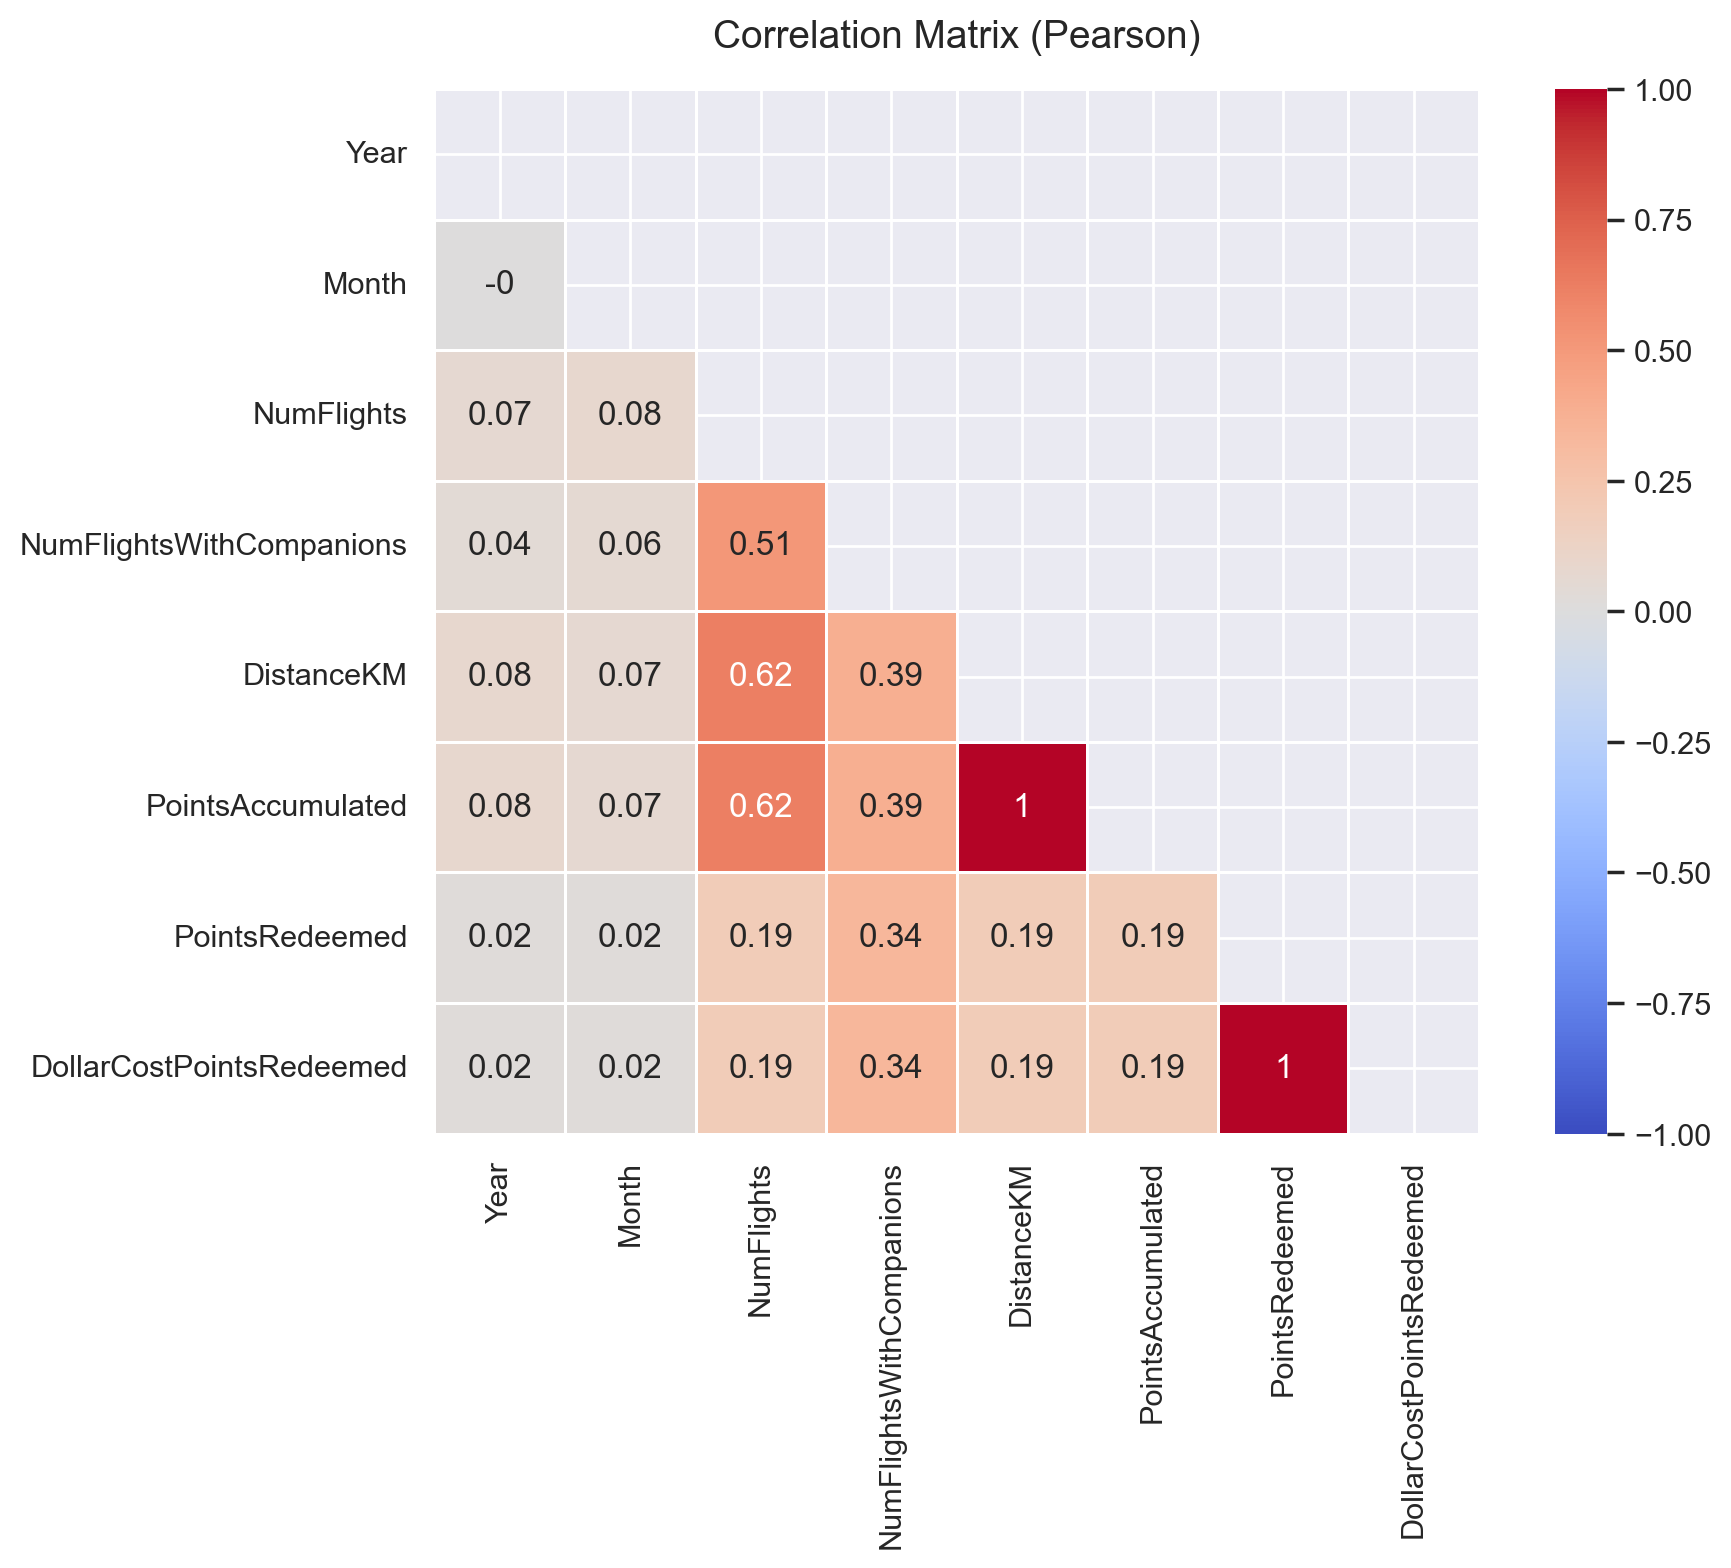

In [477]:
corr = new.corr(method="pearson"). round(2)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Visualize correlation matrix
fig = plt.figure(figsize=(10, 8))

sns.heatmap(
    corr,
    mask=mask,                # hide upper triangle
    annot=True,               # show values
    cmap="coolwarm",          # divergent color map
    center=0,                 # center colormap in 0
    linewidths=0.5,           # lines between cells to help visualization
    vmin=-1, vmax=1,          # fix scale
    square=True               # make cells square-shaped
)


plt.title("Correlation Matrix (Pearson)", fontsize=14, pad=15)
plt.tight_layout() # improve layout by reducing overlaps
plt.show()


The correlation analysis between variables provides a clearer understanding of their relationships. Some features are highly or perfectly correlated, suggesting that not all variables may be necessary for subsequent analyses. In particular, PointsRedeemed and DollarCostPointsRedeemed, as well as DistanceKM and PointsAccumulated, show very strong correlations, indicating potential redundancy.

Still on this section we will examine the correlation between variables using Spearman's rank correlation coefficient. Unlike Pearson correlation, Spearman correlation measures the strength and direction of a monotonic relationship between variables, making it more robust to non-linear relationships and outliers. This approach allows us to better understand dependencies in the data, especially for variables that may not follow a normal distribution.

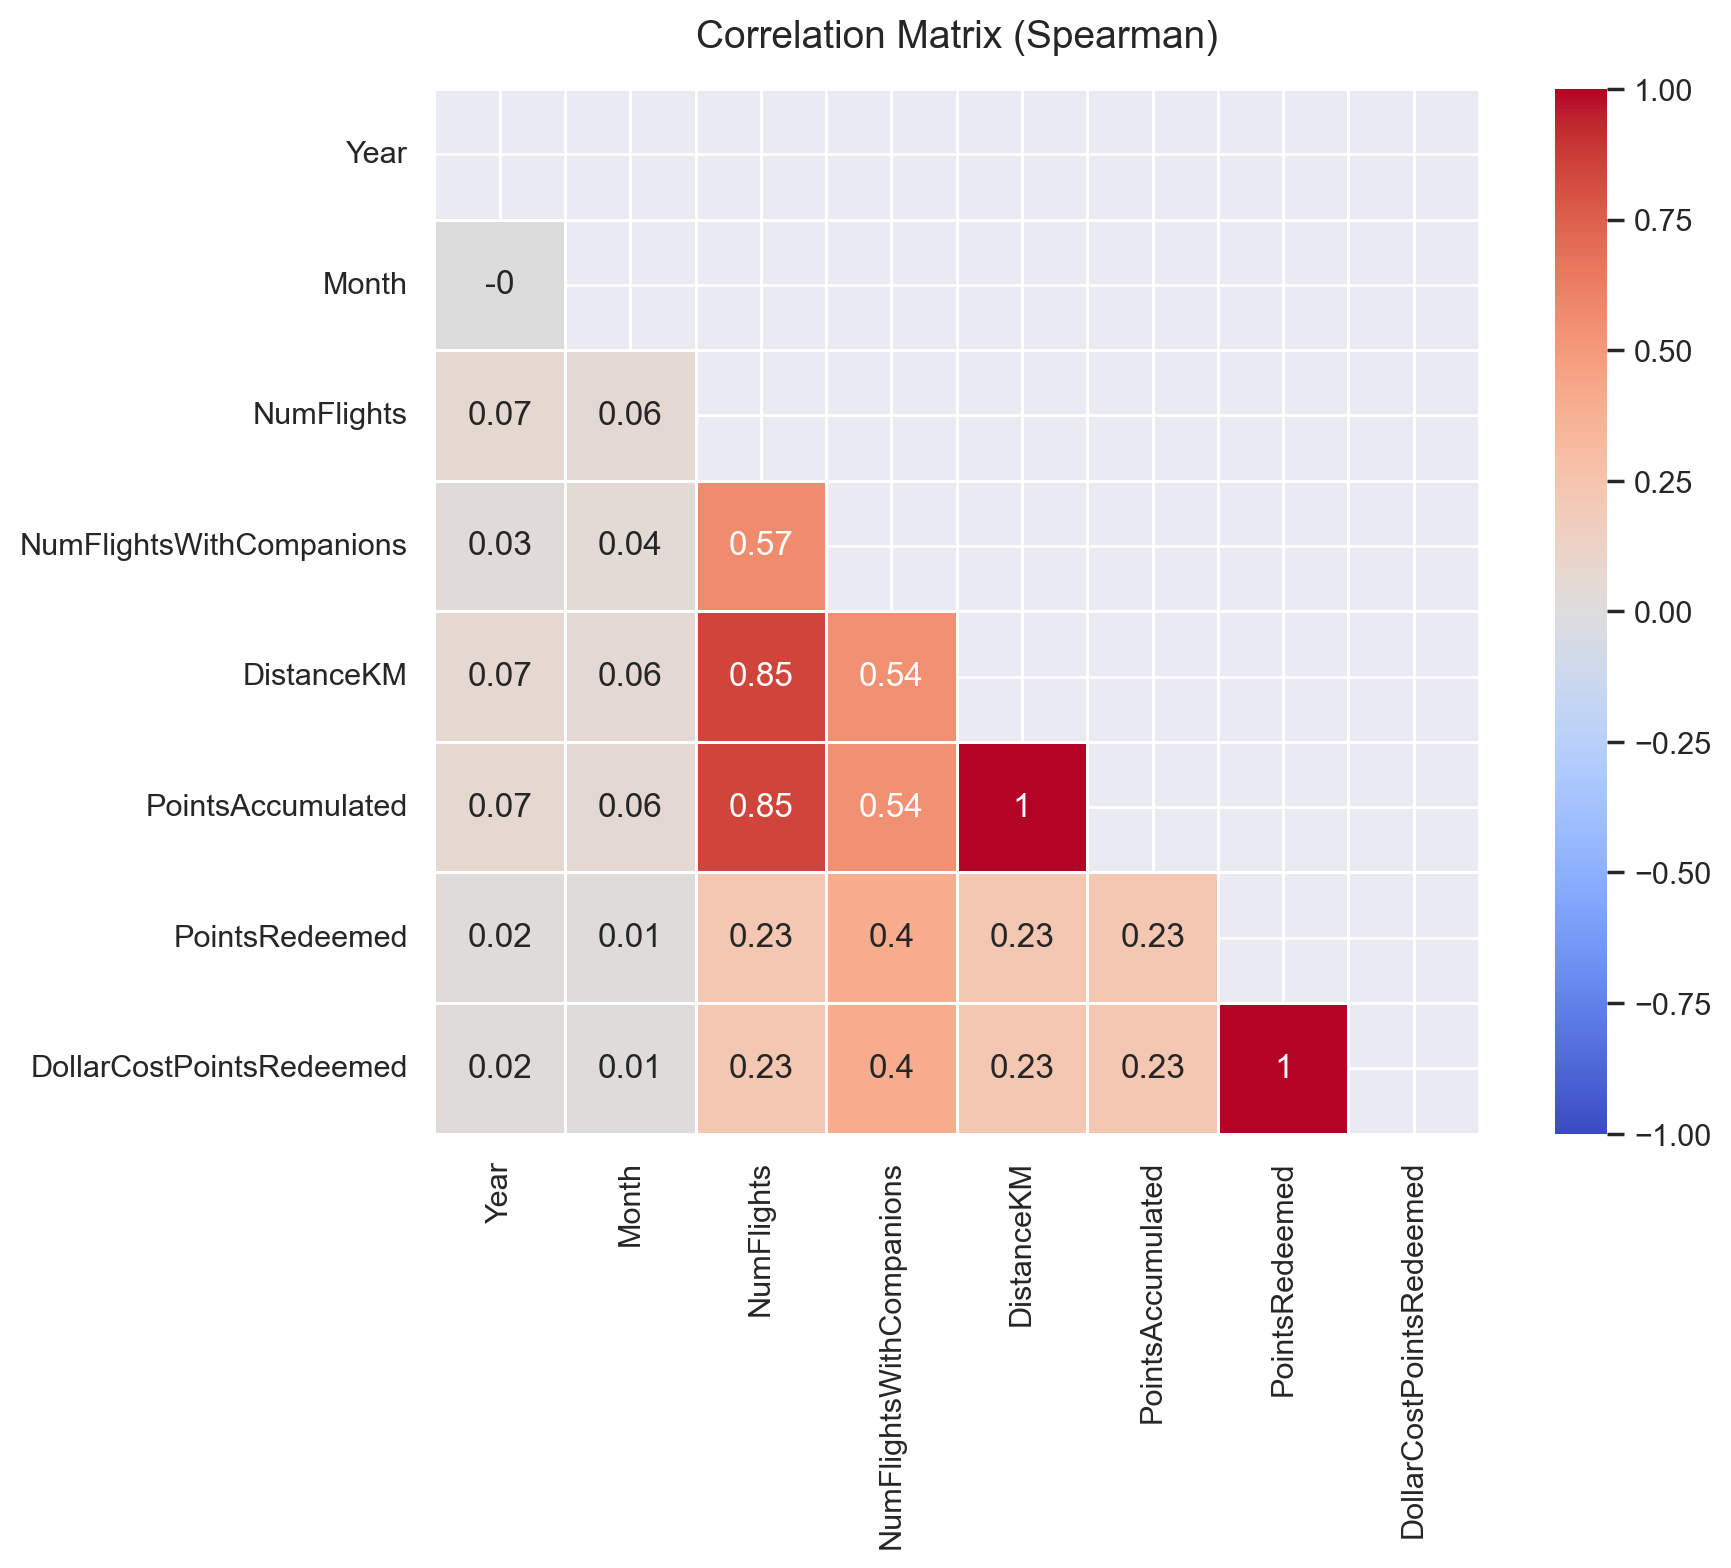

In [478]:
corr = new.corr(method="spearman"). round(2)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Visualize correlation matrix
fig = plt.figure(figsize=(10, 8))

sns.heatmap(
    corr,
    mask=mask,                # hide upper triangle
    annot=True,               # show values
    cmap="coolwarm",          # divergent color map
    center=0,                 # center colormap in 0
    linewidths=0.5,           # lines between cells to help visualization
    vmin=-1, vmax=1,          # fix scale
    square=True               # make cells square-shaped
)


plt.title("Correlation Matrix (Spearman)", fontsize=14, pad=15)
plt.tight_layout() # improve layout by reducing overlaps
plt.show()


The conclusions from the Spearman correlation analysis are largely consistent with the previous correlation analysis.

# Customer Dataset

## General Look at the Data (CustomerDB)

In this section, we provide an initial overview of the CustomerDB dataset, examining its structure, and general characteristics to gain a better understanding of the customer information before deeper analysis.

In [479]:
customerDB.shape

(16921, 19)

In [480]:
customerDB.head(10)

,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
Loyalty#,,,,,,,,,,,,,,,,,,,
480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard
608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard
530508,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,-75.713364,J8Y 3Z5,male,Bachelor,Suburban,97832.0,Married,Star,10/25/2017,NaN,3842.79,2021 Promotion
193662,Leatrice,Hanlin,Leatrice Hanlin,Canada,Yukon,Whitehorse,60.721188,-135.056840,Y2K 6R0,male,Bachelor,Rural,26262.0,Married,Star,5/7/2015,NaN,3844.57,Standard
927943,Hue,Sellner,Hue Sellner,Canada,Ontario,Toronto,43.653225,-79.383186,P5S 6R4,female,College,Urban,0.0,Single,Star,6/9/2017,NaN,3857.95,Standard
188893,Nakia,Cash,Nakia Cash,Canada,Ontario,Trenton,44.101128,-77.576309,K8V 4B2,male,Bachelor,Suburban,93272.0,Married,Star,12/8/2019,NaN,3861.49,Standard
852392,Arlene,Conterras,Arlene Conterras,Canada,Quebec,Montreal,45.501690,-73.567253,H2Y 2W2,female,Bachelor,Suburban,93272.0,Married,Star,5/30/2018,NaN,3861.49,Standard


In [481]:
customerDB.tail(20)

,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
Loyalty#,,,,,,,,,,,,,,,,,,,
999987,Layla,Murphy,Layla Murphy,Canada,New Brunswick,Fredericton,46.029263,-66.565150,R4H 2Y2,female,Bachelor,Urban,NaN,Single,Star,3/7/2017,3/7/2017,NaN,Standard
999988,Jana,Parker,Jana Parker,Canada,Quebec,Montreal,45.573672,-73.523012,N6B 1N3,male,College,Rural,NaN,Single,Star,8/22/2017,8/22/2017,NaN,Standard
999989,Ethan,Parker,Ethan Parker,Canada,Ontario,Trenton,44.075379,-77.550375,P8F 5C8,male,College,Rural,NaN,Married,Star,9/12/2015,9/12/2015,NaN,Standard
999990,Ryan,Anderson,Ryan Anderson,Canada,New Brunswick,Moncton,46.106617,-64.714267,B6P 6D0,female,College,Rural,NaN,Married,Star,6/10/2019,6/10/2019,NaN,Standard
999991,Olivia,Cote,Olivia Cote,Canada,New Brunswick,Fredericton,45.950000,-66.652437,X3W 5N2,female,College,Suburban,NaN,Married,Star,7/20/2019,7/20/2019,NaN,Standard
999992,Ella,Roy,Ella Roy,Canada,Ontario,Toronto,43.706878,-79.437412,P6D 6N2,male,College,Suburban,NaN,Single,Star,3/27/2021,3/27/2021,NaN,Standard
999993,Elijah,Cook,Elijah Cook,Canada,British Columbia,Dawson Creek,55.701475,-120.181716,W6H 0Z7,female,College,Suburban,NaN,Married,Star,1/27/2015,1/27/2015,NaN,Standard
999994,Ethan,Chan,Ethan Chan,Canada,Ontario,Ottawa,45.365906,-75.723181,B2F 3E1,female,College,Rural,NaN,Married,Star,5/5/2016,5/5/2016,NaN,Standard
999995,Liam,Wong,Liam Wong,Canada,Ontario,Ottawa,45.471557,-75.704868,B3A 2R0,female,College,Suburban,NaN,Married,Star,3/2/2020,3/2/2020,NaN,Standard


From the visualization of the head and tail of the data base we can already understand that some errors exist:

    - Missing values in some features
    - EnrollmentType as "2021 Promotion" when it's suppose to be a type
We will further analyse this using describe and info.

It's also possible to see that some variables are redundante, such as Costumer Name, First Name and Last Name
To solve this problem we will uniformize all the values in data preparation.

## Data Quality Check (customerDB)

In this section, we evaluate the quality of our datasets to ensure they are suitable for analysis. This includes checking for missing values, duplicates, and other potential data issues.

In [482]:
customerDB.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16921 entries, 480934 to 100016
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   First Name               16921 non-null  object 
 1   Last Name                16921 non-null  object 
 2   Customer Name            16921 non-null  object 
 3   Country                  16921 non-null  object 
 4   Province or State        16921 non-null  object 
 5   City                     16921 non-null  object 
 6   Latitude                 16921 non-null  float64
 7   Longitude                16921 non-null  float64
 8   Postal code              16921 non-null  object 
 9   Gender                   16921 non-null  object 
 10  Education                16921 non-null  object 
 11  Location Code            16921 non-null  object 
 12  Income                   16901 non-null  float64
 13  Marital Status           16921 non-null  object 
 14  LoyaltyStatus        

From info we can see that:

    - missing values in Income, CustomerLifetimeValue, CancellationDate
* the missing values in the features Income can make sense in cases where customers do not want to share their personal annual income. Or they may also be input errors. (Depends on interpretation).

* We can also believe that it makes sense to have NaN values in “CancellationDate,” as this means that there are customers who have not left the program.

* For the “CustomerLifetimeValue” variable, we believe that it does not make sense to have NaN values because even if the customer has no value for the company, their CustomerLifetimeValue will be 0.

What will we do?

    Analyse with describe to have a different view

Before that we will better analyse the missing values using the function implemented before. 

The result showned that the Customer Dataset contains some missing values. The CancellationDate column has a large proportion of missing data (over 86%), likely because many customers have not cancelled. Income and Customer Lifetime Value have very few missing values, representing less than 0.2% of the dataset, which should have minimal impact on analysis.

In [495]:
check_missing(customerDB, "Customer Dataset")

Missing values in Customer Dataset:


,Missing Count,Missing %
Income,20,0.118196
CancellationDate,14611,86.348325
Customer Lifetime Value,20,0.118196


In [484]:
customerDB.describe()

,Latitude,Longitude,Income,Customer Lifetime Value
count,16921.000000,16921.000000,16901.000000,16901.000000
mean,47.174500,-91.814768,37758.038400,7990.460188
std,3.307971,22.242429,30368.992499,6863.173093
min,42.984924,-135.056840,0.000000,1898.010000
25%,44.231171,-120.237660,0.000000,3979.720000
50%,46.087818,-79.383186,34161.000000,5780.180000
75%,49.282730,-74.596184,62396.000000,8945.690000
max,60.721188,-52.712578,99981.000000,83325.380000


In [485]:
customerDB.describe(include='object').T

,count,unique,top,freq
First Name,16921,4941,Deon,13
Last Name,16921,15404,Salberg,4
Customer Name,16921,16921,Cecilia Householder,1
Country,16921,1,Canada,16921
Province or State,16921,11,Ontario,5468
City,16921,29,Toronto,3390
Postal code,16921,75,V6E 3D9,917
Gender,16921,2,female,8497
Education,16921,5,Bachelor,10586
Location Code,16921,3,Suburban,5716


From the numeric and categorical describe of CustomerDB, we can see that the dataset contains 16,921 customer records, all located in Canada. 
Income and Customer Lifetime Value (CLV) have substantial variability, and 20 missing values exist in both fields. Income also contains zeros, which may indicate unreported data rather than true zero earnings.

Most customers are still active, as indicated by the small number of recorded cancellations. The distribution of EnrollmentDateOpening shows clusters of identical dates, because out of 16,921 customer records, only 2,449 unique enrollment dates exist. This means many customers share the same enrollment date, suggesting promotional campaigns or cohort effects, rather than a uniform distribution of enrollments over time. 

Categorical variables such as Education and EnrollmentType are heavily skewed, with the majority of customers having a Bachelor degree (10586 out of 16921 values) and a Standard enrollment type (15773 out of 1691 values). Similarly, City and PostalCode are concentrated in a few values, indicating that a small number of locations dominate the dataset.


## Deeper Analysis on CustomerDB dataset

### Unique

This analysis of unique values gives a quick overview of the dataset, showing which variables are diverse, nearly unique, or categorical with limited options.

After this analysis we can see that customer-level categorical variables show reasonable diversity. First Name, Last Name, and Customer Name seemed nearly unique, as expected. Country has a single value (Canada), while Province/State, City, and Postal Code have distinct values. 

Categorical variables such as Gender, Education, Location Code, Marital Status, LoyaltyStatus, and EnrollmentType have a limited set of distinct values. Date related variables such as EnrollmentDateOpening, CancellationDate and continuous variables Income and Customer Lifetime Value contain many unique values and some missing values or close to zero values, reflecting varied customer activity, enrollment over time and maybe some erros.

The unique values analysis highlights variable diversity and potential data issues, providing a foundation for further exploration and cleaning.

In [486]:
for column in customerDB.columns:
    unique_values = customerDB[column].unique()
    print(f"Unique values on the column '{column}': {unique_values}")
    print('-----------------------------------')
    print('')

Unique values on the column 'First Name': ['Cecilia' 'Dayle' 'Necole' ... 'Juliann' 'Olivia' 'Liam']
-----------------------------------

Unique values on the column 'Last Name': ['Householder' 'Menez' 'Hannon' ... 'Bennett' 'Wilson' 'Martin']
-----------------------------------

Unique values on the column 'Customer Name': ['Cecilia Householder' 'Dayle Menez' 'Necole Hannon' ... 'Amelia Bennett'
 'Benjamin Wilson' 'Emma Martin']
-----------------------------------

Unique values on the column 'Country': ['Canada']
-----------------------------------

Unique values on the column 'Province or State': ['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
-----------------------------------

Unique values on the column 'City': ['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Moncton' 'Fredericton' 'Ottawa' 'Tremblant'
 'Calgary' 'Whis

### Values Count

This analysis will show us the distribution of values across the dataset. 

All customers have unique Customer Name entries, and first/last names are rare, with a few recurring more frequently. All customers are in Canada, with the highest concentration in Ontario, British Columbia, and Quebec. Cities such as Toronto, Vancouver, and Montreal dominate the dataset, while many smaller cities have much fewer records.
Categorical variables show clear prevalence. Gender is almost balanced, Education is dominated by Bachelor degrees, Location Code is fairly even across Suburban, Rural, and Urban, Marital Status is mainly Married, LoyaltyStatus is mostly Star nad EnrollmentType is overwhelmingly Standard.

Continuous and date-related variables (Income, Customer Lifetime Value, EnrollmentDateOpening, CancellationDate) exhibit a wide range of values, with some repeated peaks indicating common enrollment dates, cancellation dates, or popular income levels. 

Overall, the value counts highlight which categories and values are most frequent, giving a sense of concentration versus diversity in the dataset.

In [487]:
for column in customerDB.columns:
    count_values = customerDB[column].value_counts()
    print(f"The number of the distinct values in the column '{column}' is: {count_values}")
    print('-----------------------------------')
    print('')

The number of the distinct values in the column 'First Name' is: First Name
Deon          13
Stacey        13
Merrill       12
Rudy          12
Loren         12
              ..
Eldora         1
Kristopher     1
Violette       1
Rosanna        1
Liam           1
Name: count, Length: 4941, dtype: int64
-----------------------------------

The number of the distinct values in the column 'Last Name' is: Last Name
Salberg      4
Ypina        4
Amodei       3
Mesteth      3
Sather       3
            ..
Melick       1
Dagel        1
Pynes        1
Mcclaskey    1
Martin       1
Name: count, Length: 15404, dtype: int64
-----------------------------------

The number of the distinct values in the column 'Customer Name' is: Customer Name
Cecilia Householder    1
Agnes Beary            1
Larry Floss            1
Rosaline Goud          1
Lola Mamon             1
                      ..
Aiko Beaubien          1
Annalisa Kara          1
Hana Stibb             1
Allegra Lounder        1
Emma Martin

#### Check Duplicates

In [488]:
customerDB.duplicated().sum()

np.int64(0)

Checking the duplicates we verify that we don´t have any.

But it's still important to check the duplicates without the names features.

In [489]:
customerDB_no_name = customerDB.drop(columns=["First Name", "Last Name", "Customer Name"])
customerDB_no_name.duplicated().sum()

np.int64(0)

The result is the same so we can conclude that there aren't duplicated values in this DataFrame.

Contrary to what we have seen with the Flights dataset, here is not important to consider the values of Loyalty# as a feature. Still, so we can be consistint when analysing our datasets, we will had this column as a feature also to this dataset.

In [490]:
customerDB = pd.read_csv('DM_AIAI_CustomerDB.csv', sep = ",")
# code that we also did in the begining because there's a column with the index numbers that is completely unuseful
customerDB = customerDB.iloc[:, 1:] 

# to verify that the Loyalty# is now a feature and not an index anymore
customerDB.head()

,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
0,480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard
3,608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard
4,530508,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,-75.713364,J8Y 3Z5,male,Bachelor,Suburban,97832.0,Married,Star,10/25/2017,NaN,3842.79,2021 Promotion


### Correlation between variables

In this section, we examine the relationships between numerical variables using a correlation matrix. This allows us to identify strong associations, potential redundancies, and patterns that may inform further analysis or feature selection.

As before this correlation is also an important analysis to be done. However this doesn't make sense for all variables so we create a new DataFrame with only the variables we want to use to check the correlation.

In [491]:
# create a copy of the customerDB and select only the relevant columns for correlation analysis
new = customerDB.copy()
new = new[["Latitude", "Longitude", "Income", "Customer Lifetime Value", "EnrollmentDateOpening", "CancellationDate"]]

# converting date columns to datetime format
new['EnrollmentDateOpening'] = pd.to_datetime(new['EnrollmentDateOpening'], format='%m/%d/%Y', errors='coerce')
new['CancellationDate'] = pd.to_datetime(new['CancellationDate'], format='%m/%d/%Y', errors='coerce')

# using the two date columns converted before to create a new column with the customer duration in days
new['CustomerDurationDays'] = (new['CancellationDate'] - new['EnrollmentDateOpening']).dt.days

# choose the numerical columns for correlation analysis
cols = ["Latitude", "Longitude", "Income", "Customer Lifetime Value", "CustomerDurationDays"]
new[cols].corr(method='pearson')

,Latitude,Longitude,Income,Customer Lifetime Value,CustomerDurationDays
Latitude,1.000000,-0.764840,-0.002009,-0.002207,-0.015645
Longitude,-0.764840,1.000000,0.002928,0.006218,0.011865
Income,-0.002009,0.002928,1.000000,0.024026,-0.016729
Customer Lifetime Value,-0.002207,0.006218,0.024026,1.000000,-0.035992
CustomerDurationDays,-0.015645,0.011865,-0.016729,-0.035992,1.000000


From the code before it's difficult to get conclusions. We will visualize this matrix in a easy way of getting conclusions.

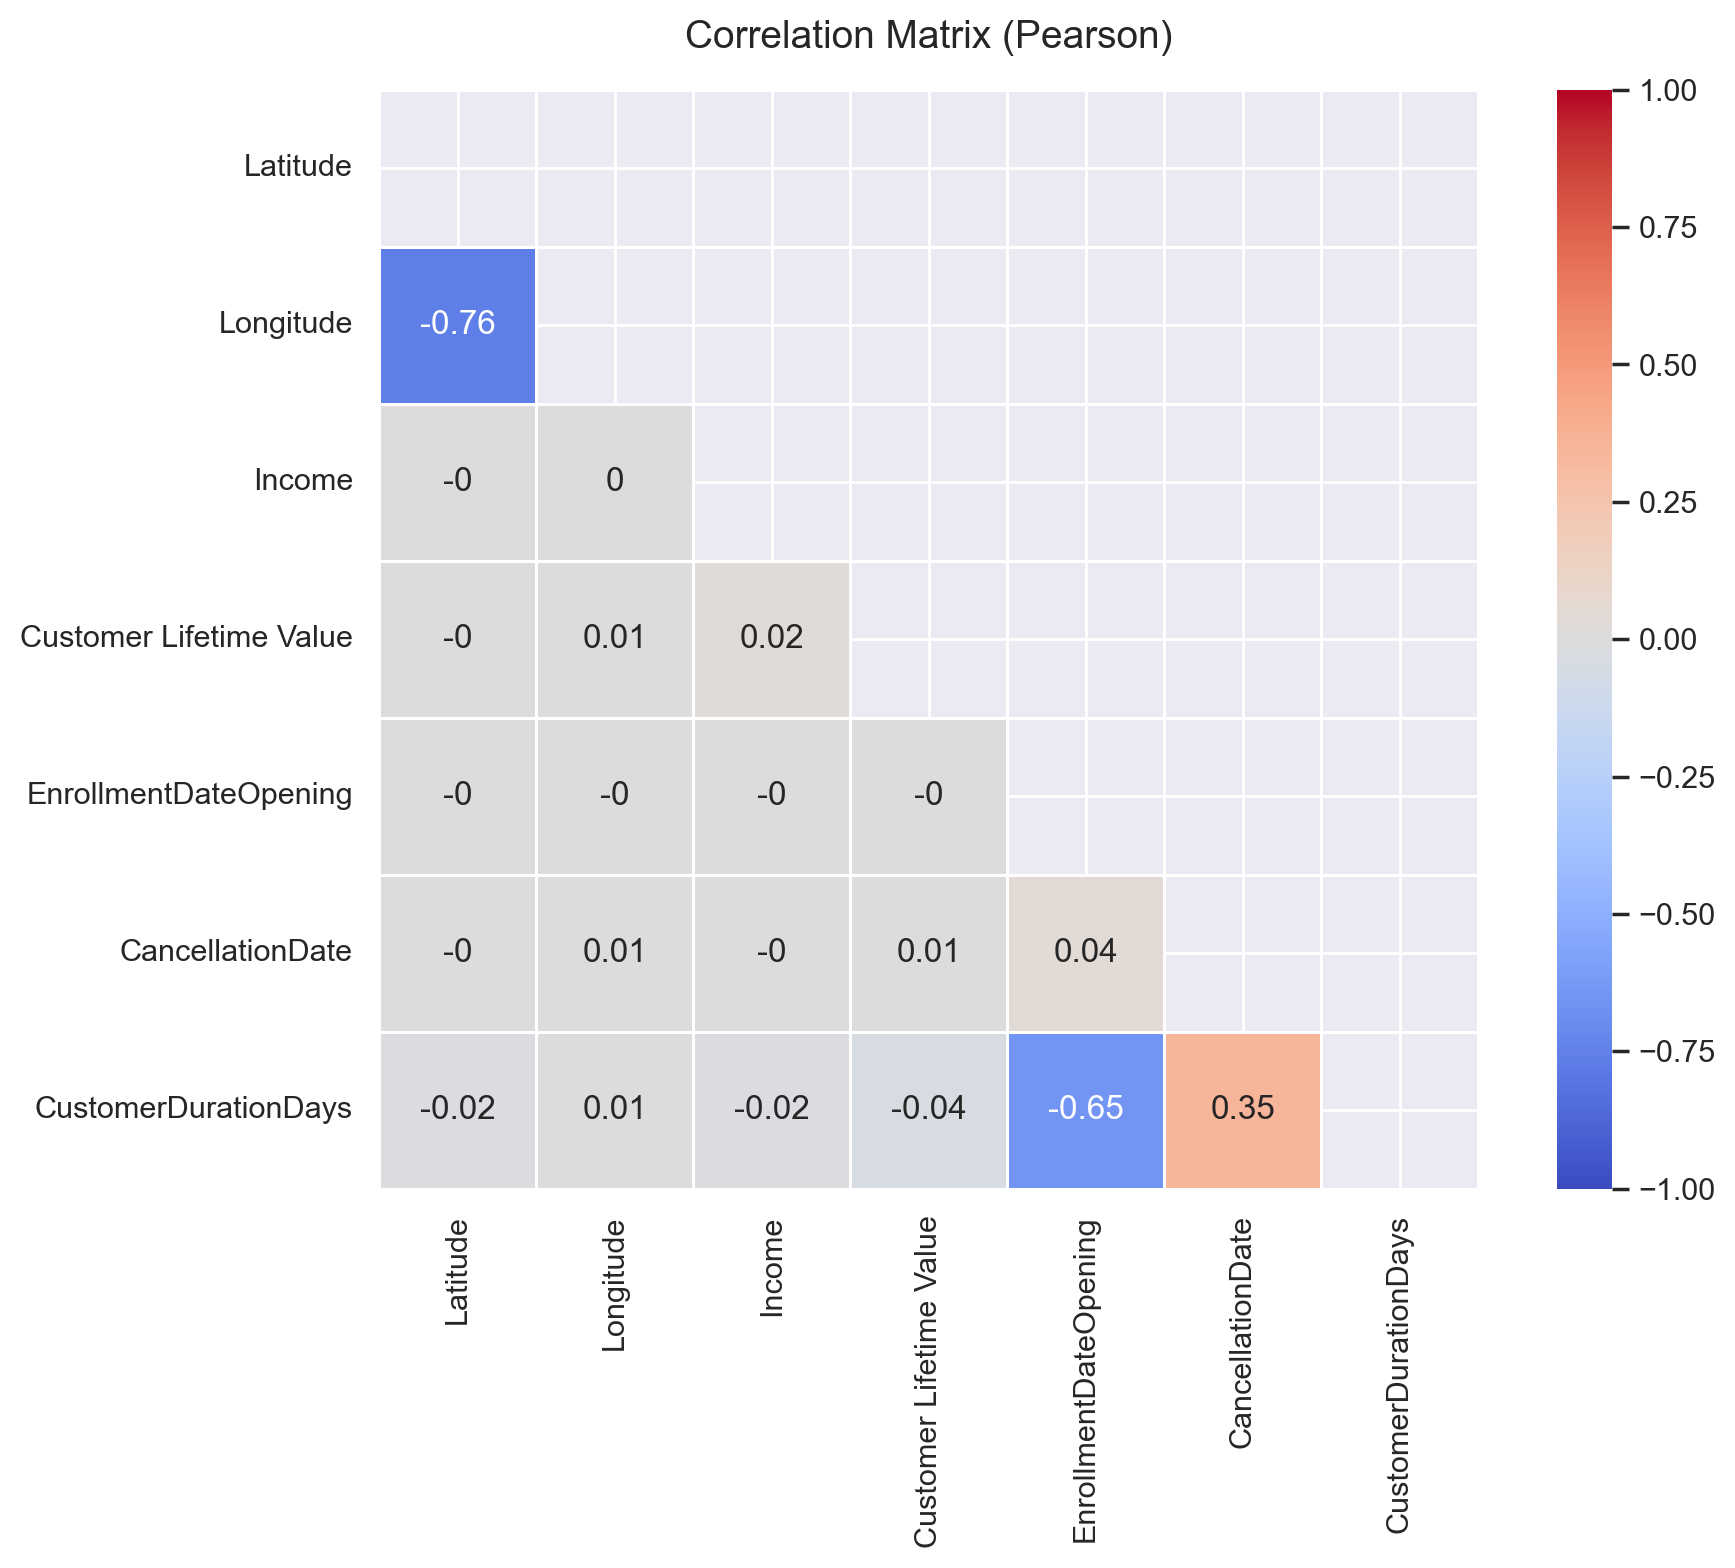

In [492]:
corr = new.corr(method="pearson"). round(2)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Visualize correlation matrix
fig = plt.figure(figsize=(10, 8))

sns.heatmap(
    corr,
    mask=mask,                # hide upper triangle
    annot=True,               # show values
    cmap="coolwarm",          # divergent color map
    center=0,                 # center colormap in 0
    linewidths=0.5,           # lines between cells to help visualization
    vmin=-1, vmax=1,          # fix scale
    square=True               # make cells square-shaped
)


plt.title("Correlation Matrix (Pearson)", fontsize=14, pad=15)
plt.tight_layout() # improve layout by reducing overlaps
plt.show()


The correlation analysis between variables is now much easier to interpret. We can see that EnrollmentDateOpening and CustomerDurationDays are correlated; however, this correlation is not strong enough to justify dropping either variable. Similarly, Latitude and Longitude show a higher correlation, but it is still not sufficient to remove one of them from the dataset.


Still on this section and in the same way that we did for the FlightsDB dataset we will examine the correlation between variables using Spearman's rank correlation coefficient.

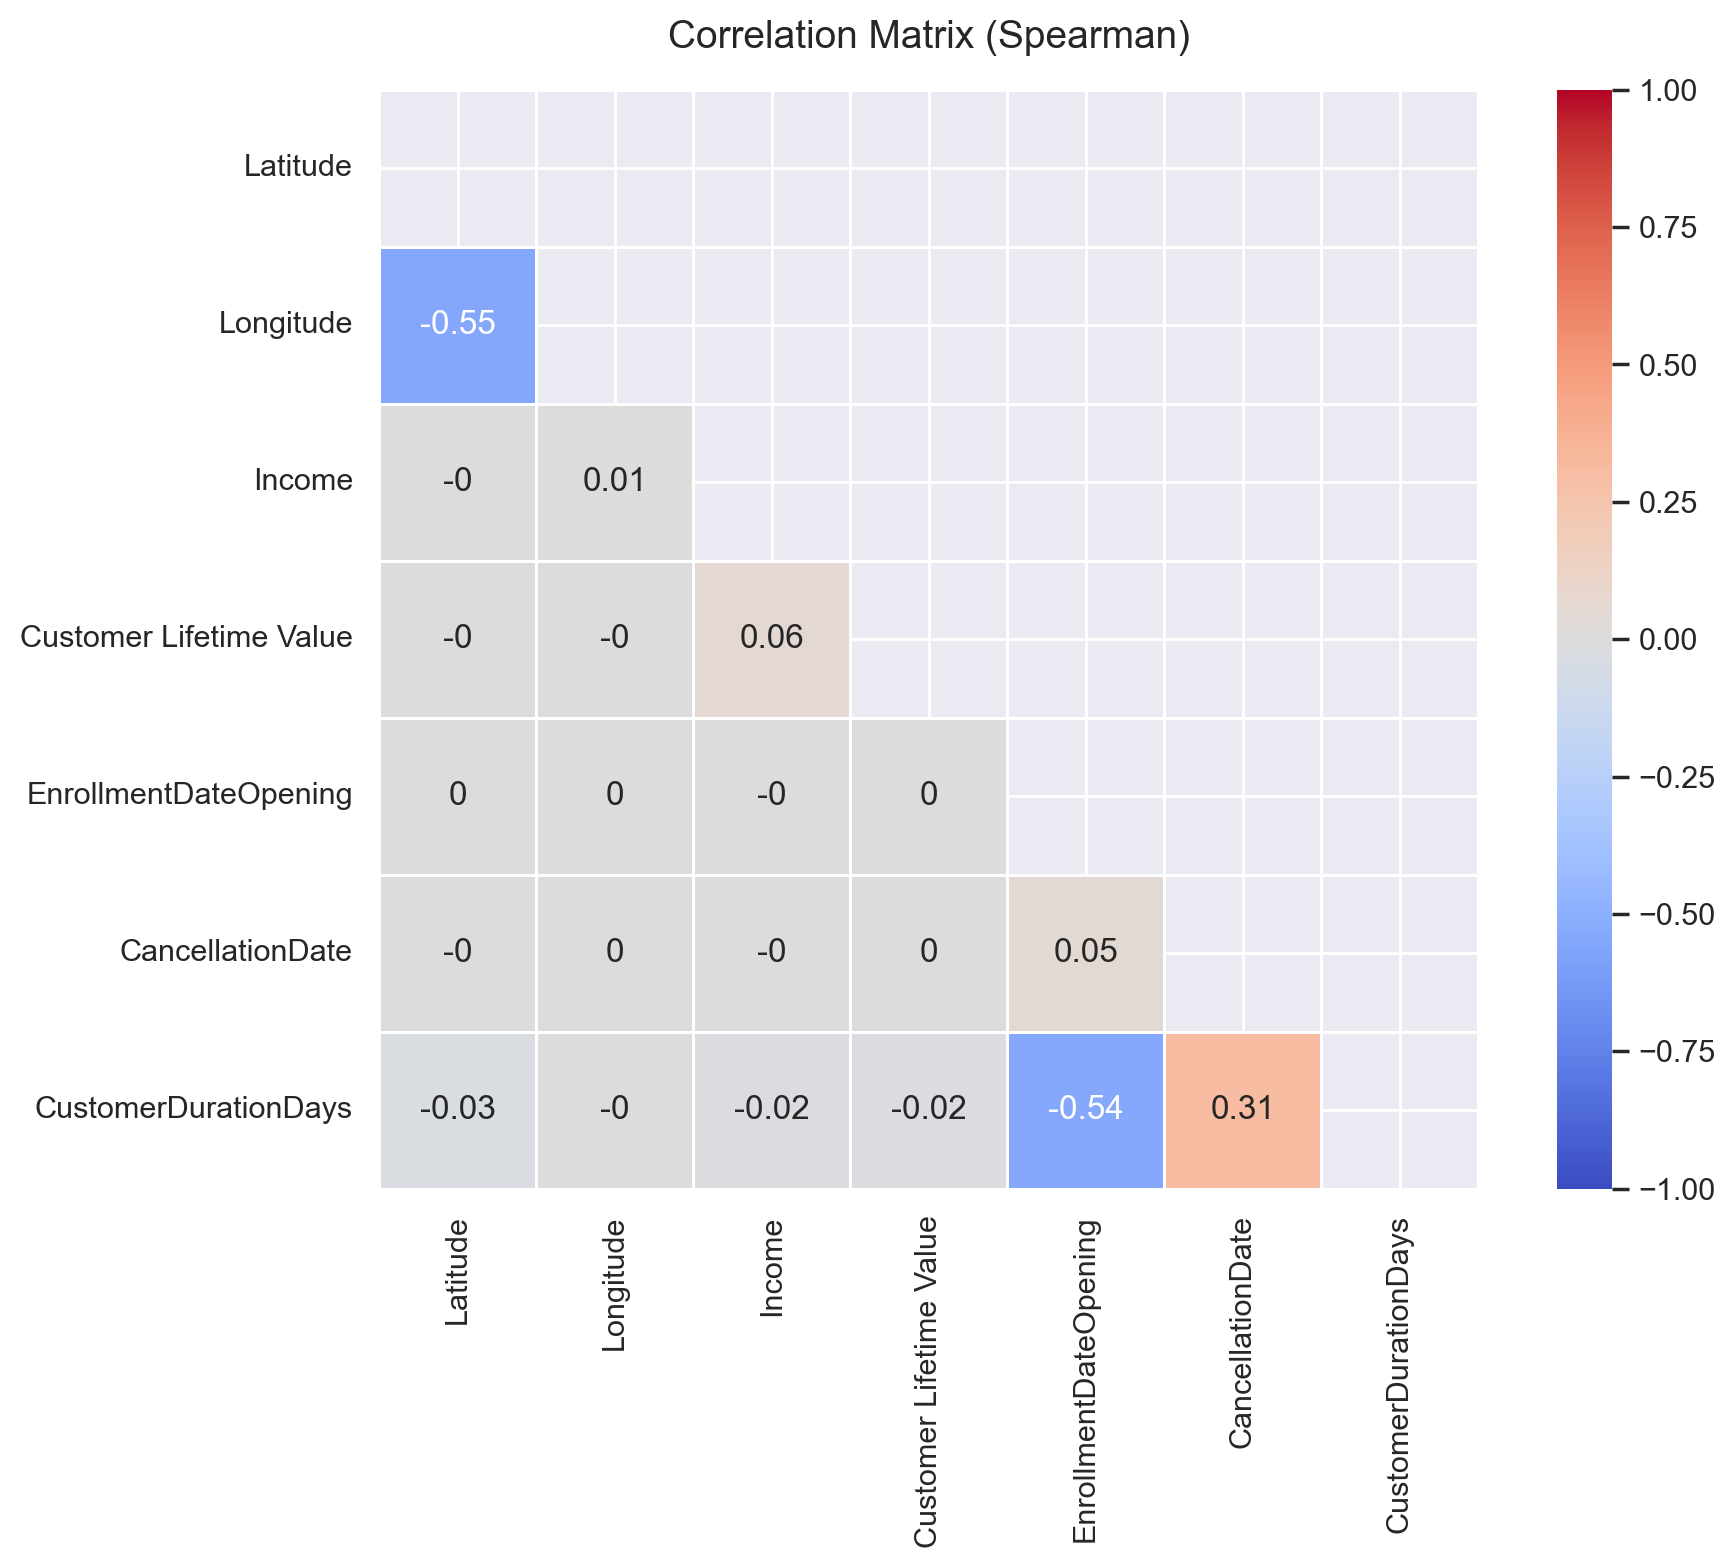

In [493]:
corr = new.corr(method="spearman").round(2)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Visualize correlation matrix
fig = plt.figure(figsize=(10, 8))

sns.heatmap(
    corr,
    mask=mask,                # hide upper triangle
    annot=True,               # show values
    cmap="coolwarm",          # divergent color map
    center=0,                 # center colormap in 0
    linewidths=0.5,           # lines between cells to help visualization
    vmin=-1, vmax=1,          # fix scale
    square=True               # make cells square-shaped
)


plt.title("Correlation Matrix (Spearman)", fontsize=14, pad=15)
plt.tight_layout() # improve layout by reducing overlaps
plt.show()

The conclusions from the Spearman correlation analysis are largely consistent with the previous correlation analysis.